In [ ]:
from datetime import date
from pathlib import Path

## Absolute path to the folder where you want to save figures - this folder must exist as a valid directory
save_dir = '' # FIXME (keep the trailing "/"!)
assert(Path(save_dir)).exists()

## Absolute path to the figures data directory (the local path is shown below and should generally work)
figures_data_dir = 'Data/' # FIXME (keep the trailing "/"!)
assert(Path(figures_data_dir)).exists()

## If you want to save figure outputs, default ON
file_save = True

# Library imports

In [2]:
import matplotlib
mpl = matplotlib

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

mpl.rcParams['figure.figsize'] = (6.0,4.0) # default = (6.0, 4.0)
mpl.rcParams['font.size']      = 12       # default = 10

mpl.rcParams['axes.linewidth']    = 0.75 # default = 1.0
mpl.rcParams['lines.linewidth']   = 1.5 # default = 1.0
mpl.rcParams['patch.linewidth']   = 1.0 # default = 1.0
mpl.rcParams['grid.linewidth']    = 0.5 # default = 0.5
mpl.rcParams['xtick.major.width'] = 1.0 # default = 0.5
mpl.rcParams['xtick.minor.width'] = 0.0 # default = 0.5
mpl.rcParams['ytick.major.width'] = 1.0 # default = 0.5
mpl.rcParams['ytick.minor.width'] = 0.0 # default = 0.5

def make_nice_axis(ax):
    """ Function to beautify axis"""
    ax.xaxis.set_ticks_position('bottom')
    ax.xaxis.set_tick_params(pad=10,top='on',direction='in')
    ax.yaxis.set_tick_params(pad=10,top='on',direction='in')
    ax.xaxis.set_tick_params(labelsize=10)
    ax.yaxis.set_tick_params(labelsize=10)

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# Set the font to Arial
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.sans-serif'] = ['Arial']

import pandas as pd
import os

def save_figure(fig, fig_file):
    """
    Save the given figure object as PDF and PNG formats.

    Parameters:
    fig (matplotlib.figure.Figure): The figure object to be saved.
    fig_file (str): The file path (including the file name without extension) where the figure will be saved.

    Returns:
    None
    """
    os.makedirs(os.path.dirname(fig_file), exist_ok=True)
    fig.savefig(fname=fig_file + ".pdf", dpi=300, format='pdf',bbox_inches='tight')
    fig.savefig(fname=fig_file + ".png", dpi=1200, format='png')

### MD Related Libraries and Functions

In [3]:
## MD Related Libraries and Functions ##
import pickle
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import pickle
import matplotlib.patches as patches
import csv

#create color list for plotting MIPs
colorfolder='ColorforSpecies/'
mip_color_list={}
for colorfile in os.listdir(colorfolder):
    color_data=pickle.load(open(colorfolder+'/'+colorfile,'rb'))
    name=colorfile.split('.')[0]
    mip_color_list[name]=color_data



def csv_to_dict(filename):
    """
    Convert a CSV file to a dictionary.

    Parameters:
    filename (str): The path to the CSV file.

    Returns:
    dict: A dictionary where the keys are the first column of the CSV and the values are the sum of the remaining columns.
    """
    dict_matrix_all={}
    with open(filename,'r') as csvfile:
        reader=csv.reader(csvfile)
        for row in reader:
            if not row:
                continue
            if row[0][0] !='#':
                key=row[0]
                values=row[1:]
                if values:
                    values=sum([float(v) for v in values])
                else:
                    values=float(values[0])
                dict_matrix_all[key]=values
    return dict_matrix_all


def csv_to_matrix(ip,title,local_save_dir,oldmodel=False,annot=False,file_save=False):
    """
    Convert a CSV file to a matrix and plot a heatmap.

    Parameters:
    ip (str): The path to the CSV file.
    title (str): The title of the heatmap.
    oldmodel (bool): Whether to use the old model structure. Default is False.
    annot (bool): Whether to annotate the heatmap. Default is False.
    file_save (bool): Whether to save the heatmap as a file. Default is False.

    Returns:
    None
    """
    ip=csv_to_dict(ip)
    if oldmodel:
        labels = ["5'", 'M', "3'", 'NONO', 'FUS']
        matrix={}

        matrix["5'"]=np.array([ip['Eep'],ip['EMep'],ip['Eep'],ip['P1E1ep'],ip['P2E1ep']])
        matrix['M']=np.array([ip['EMep'],ip['Mep'],ip['EMep'],ip['P1Mep'],ip['P2Mep']])
        matrix["3'"]=np.array([ip['Eep'],ip['EMep'],ip['Eep'],ip['P1E2ep'],ip['P2E2ep']])
        matrix['NONO']=np.array([ip['P1E1ep'],ip['P1Mep'],ip['P1E2ep'],ip['P1ep'],ip['P12ep']])
        matrix['FUS']=np.array([ip['P2E1ep'],ip['P2Mep'],ip['P2E2ep'],ip['P12ep'],ip['P2ep']])
    else:
        labels = ["5'", 'M', "3'", 'NONO', 'FUS', 'Tdp43']
        matrix={}

        matrix["5'"]=np.array([ip['Eep'],ip['EMep'],ip['Eep'],ip['P1E1ep'],ip['P2E1ep'],ip['P3E1ep']])
        matrix['M']=np.array([ip['EMep'],ip['Mep'],ip['EMep'],ip['P1Mep'],ip['P2Mep'],ip['P3Mep']])
        matrix["3'"]=np.array([ip['Eep'],ip['EMep'],ip['Eep'],ip['P1E2ep'],ip['P2E2ep'],ip['P3E2ep']])
        matrix['NONO']=np.array([ip['P1E1ep'],ip['P1Mep'],ip['P1E2ep'],ip['P1ep'],ip['P12ep'], ip['P13ep']])
        matrix['FUS']=np.array([ip['P2E1ep'],ip['P2Mep'],ip['P2E2ep'],ip['P12ep'],ip['P2ep'], ip['P23ep']])
        matrix['Tdp43']=np.array([ip['P3E1ep'],ip['P3Mep'],ip['P3E2ep'],ip['P13ep'],ip['P23ep'], ip['P3ep']])



    df = pd.DataFrame(matrix, index=labels)
    fig,ax= plt.subplots(1,1,figsize=(10, 8))
    ax = sns.heatmap(df, cmap='Purples', annot=annot,xticklabels=df.columns, yticklabels=df.index, vmin=0,vmax=3,linecolor='black', linewidth=0.25)
    cbar = ax.collections[0].colorbar
    cbar.set_label('Interaction Strength', fontsize=16)  # Set label size
    cbar.ax.tick_params(labelsize=14)  # Set tick label size
    # Add top labels
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
    ax.xaxis.set_label_position('top')
    ax.xaxis.tick_top()

    # Remove tick marks
    ax.tick_params(axis='x', which='both', length=0)
    ax.tick_params(axis='y', which='both', length=0)

    # Increase size of y-axis labels
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)

    # Add border around the entire matrix
    # Get the current position of the heatmap
    pos = ax.get_position()

    # Calculate the position and size of the rectangle
    x0, y0, width, height = pos.x0, pos.y0, pos.width, pos.height

    # Create a rectangle
    rect = patches.Rectangle((x0, y0), width, height, linewidth=2, edgecolor='black', facecolor='none', transform=ax.figure.transFigure)

    # Add the rectangle to the plot
    ax.add_patch(rect)

    plt.title(title, fontsize=16)

    if file_save:
        save_figure(fig, local_save_dir + name)

# Main figures

## Figure 1

### C - Maximum Intensity Plots

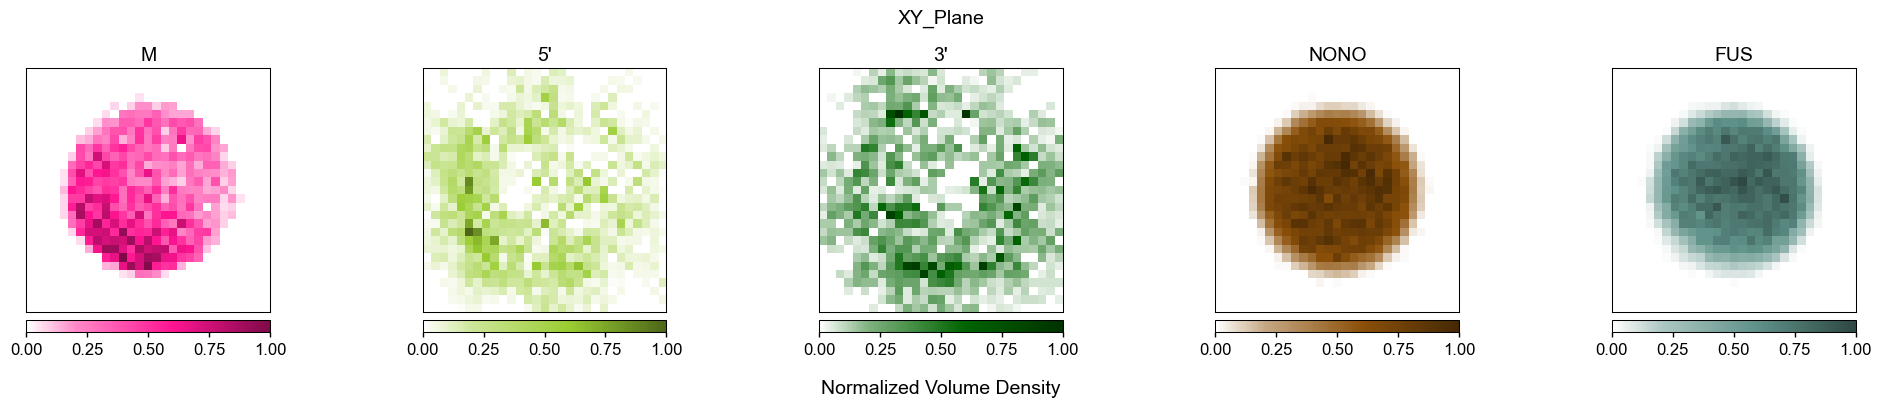

In [4]:
#pull data 
z_plane_mip= figures_data_dir + 'fig-1/OldModel_MIP_LC_z_avg'
data=pickle.load(open(z_plane_mip,'rb'))

#Create name and color dictionary to rotate through
color_dict = {'M': mip_color_list['NEAT1-M'], 'E1': mip_color_list['NEAT1-E1'], 'E2': mip_color_list['NEAT1-E2'], 'P1':  mip_color_list['NONO'], 'P2': mip_color_list['FUS'], 'P3': mip_color_list['TDP43']}
name_dict={'total':'Entire Cluster','M':'M','E1':"5'",'E2':"3'",'P1':'NONO','P2':'FUS','P3':'Tdp43'}
plt.rcParams['font.family'] = 'Arial'
#Rotate through each species and plot
fig,ax=plt.subplots(1,len(data)-2,figsize=(20,4))

n=0
for sp,mip in data.items():
    if sp=='total' or sp=='P3':
        continue
    im=ax[n].imshow(mip.T/np.max(mip.T), cmap=color_dict[sp], vmin=0, origin='lower',interpolation='nearest') 
    ax[n].set_xticks([])    
    ax[n].set_yticks([])
    ax[n].set_title(name_dict[sp], fontsize=14)
    divider = make_axes_locatable(ax[n])
    cax = divider.append_axes("bottom", size="5%", pad=0.08)
    cbar = fig.colorbar(im, cax=cax, orientation='horizontal')
    cax.xaxis.set_ticks_position('bottom')
    cax.xaxis.set_label_position('bottom') 
    n+=1
fig.suptitle('XY_Plane', fontsize=14)
fig.supxlabel('Normalized Volume Density', fontsize=14)
fig.tight_layout()

#save if true
figname='fig-1/OldModel_MIP'

if file_save:
    save_figure(fig, save_dir + figname)

## Figure 2

### A - motif distribution

<Figure size 600x400 with 0 Axes>

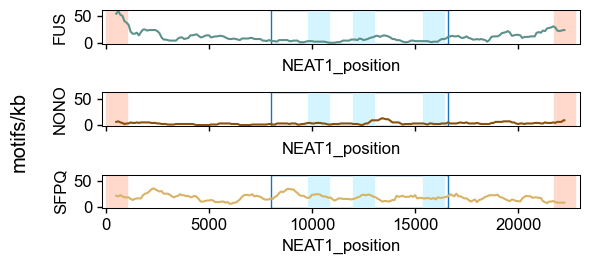

In [5]:
#pull data 
data_path= figures_data_dir + 'fig-2/motif_density.csv'
data = pd.read_csv(data_path)

# colors
Eclr = '#ffd9cc'
Cclr = '#d4f5ff'

# vertical bar ranges
m_rng = [8000-1, 16600-1]
E1_rng = [0, 1000]
C1_rng = [9800-1, 10800-1]
C2_rng = [12000-1, 13000-1]
C3_rng = [15400-1, 16400-1]
E2_rng = [21743, 22743]

### Plot with FUS, NONO, SFPQ overlaid
plt.clf()
plt.close

fig, axs = plt.subplots(ncols=1, nrows=3, figsize=(6,2.8))
# for axis in axs:
#     make_nice_axis(axis)

# vertical bars marking 1000mers
axs[0].axvspan(m_rng[0], m_rng[1], color="#1c75bc", fill=False)
axs[0].axvspan(E1_rng[0], E1_rng[1], color=Eclr)
axs[0].axvspan(C1_rng[0], C1_rng[1], color=Cclr)
axs[0].axvspan(C2_rng[0], C2_rng[1], color=Cclr)
axs[0].axvspan(C3_rng[0], C3_rng[1], color=Cclr)
axs[0].axvspan(E2_rng[0], E2_rng[1], color=Eclr)

axs[1].axvspan(m_rng[0], m_rng[1], color="#1c75bc", fill=False)
axs[1].axvspan(E1_rng[0], E1_rng[1], color=Eclr)
axs[1].axvspan(C1_rng[0], C1_rng[1], color=Cclr)
axs[1].axvspan(C2_rng[0], C2_rng[1], color=Cclr)
axs[1].axvspan(C3_rng[0], C3_rng[1], color=Cclr)
axs[1].axvspan(E2_rng[0], E2_rng[1], color=Eclr)

axs[2].axvspan(m_rng[0], m_rng[1], color="#1c75bc", fill=False)
axs[2].axvspan(E1_rng[0], E1_rng[1], color=Eclr)
axs[2].axvspan(C1_rng[0], C1_rng[1], color=Cclr)
axs[2].axvspan(C2_rng[0], C2_rng[1], color=Cclr)
axs[2].axvspan(C3_rng[0], C3_rng[1], color=Cclr)
axs[2].axvspan(E2_rng[0], E2_rng[1], color=Eclr)

sns.lineplot(data=data, x='NEAT1_position', y='FUS', ax=axs[0], color='#5e918b')
sns.lineplot(data=data, x='NEAT1_position', y='NONO', ax=axs[1], color='#8c510a')
sns.lineplot(data=data, x='NEAT1_position', y='SFPQ', ax=axs[2], color='#d8b365')

# fig.supxlabel("NEAT1 position")
fig.supylabel("motifs/kb")

axs[0].set_xlim([-200,23000])
axs[1].set_xlim([-200,23000])
axs[2].set_xlim([-200,23000])
axs[0].set_ylim([-2,62])
axs[1].set_ylim([-2,62])
axs[2].set_ylim([-2,62])

axs[0].set_xticks(ticks=[0, 5000, 10000, 15000, 20000], labels=[])
axs[1].set_xticks(ticks=[0, 5000, 10000, 15000, 20000], labels=[])
axs[2].set_xticks(ticks=[0, 5000, 10000, 15000, 20000])

figname = 'fig-2/NEAT1MotifDistr'
fig.tight_layout()
if file_save:
    save_figure(fig, save_dir+figname)

plt.show()

### B - FUS Kd, apparent

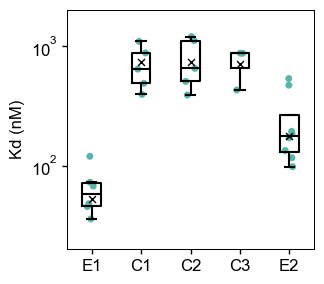

In [6]:
#pull data 
data_path= figures_data_dir + 'fig-2/EMSA_data.csv'
data_pooled_path = figures_data_dir + 'fig-2/EMSA_pooled_data.csv'
data = pd.read_csv(data_path)
data_pooled = pd.read_csv(data_pooled_path)

RNAlist = ['E1','C1','C2','C3','E2']

fig, ax = plt.subplots(figsize=[3.4,3])

sns.stripplot(data=data[data.RNA.isin(RNAlist) & data.protein.isin(['FUS'])],
              x='RNA', y='KD', hue='protein', s=5, legend=False, jitter=True, dodge=True,
              palette=["#5ab4ac"])
sns.boxplot(data=data[data.RNA.isin(RNAlist) & data.protein.isin(['FUS'])],
            x='RNA', y='KD', color='k', fill=False, legend=False, showfliers=False, gap=0.25,
            linecolor='k', width=0.5, zorder=100)
sns.stripplot(data=data_pooled[data_pooled.RNA.isin(RNAlist) & data_pooled.protein.isin(['FUS'])],
              x='RNA', y='KD', hue='protein', marker = 'x', s=5, palette = ["#000000"],
              legend=False, jitter=False, dodge=True,
              linewidth=1, edgecolor="k", zorder=200)


plt.ylabel('Kd (nM)')
plt.xlabel('')
plt.yscale('log')
plt.ylim([20,2000])
plt.tight_layout()

figname = 'fig-2/FUS_KD'
if file_save:
    save_figure(fig, save_dir+figname)

plt.show()

### C - Kd vs motifs

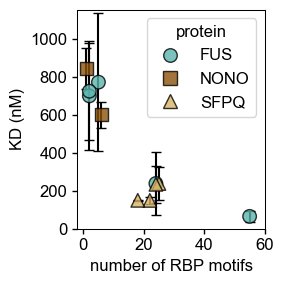

In [7]:
#pull data 
data_path= figures_data_dir + 'fig-2/EMSA_data.csv'
data = pd.read_csv(data_path)

# color palette
FNST_pal = ['#5ab4ac','#8c510a','#d8b365','#bcbddc']

# list of RNAs for which EMSA Kds were measured for each protein
RNAlist_F = ['E1','C1','C2','C3','E2','E3','E1_BH','E1_BL']
RNAlist_N = ['E1','C2']
RNAlist_S = ['E1','C1','C2','C3']
RNAlist_T = ['E3']

# number of motifs within each RNA for each protein
motiflist_F = [55, 2, 5, 2, 24, 29, 67, 18]
motiflist_N = [6, 1]
motiflist_S = [22, 25, 24, 18]
motiflist_T = [56]

# summary dataframe, KD
df_KD_summary = data.groupby(['protein','RNA']).KD.agg(['mean','std'])
df_KD_summary.rename(columns={'mean': 'KD_mean', 'std': 'KD_std'}, inplace=True)
df_KD_summary = df_KD_summary.reindex(['FUS','NONO','SFPQ','TDP-43'], level='protein')
df_KD_summary = df_KD_summary.reindex(['E1','C1','C2','C3','E2','E3','E1_BH','E1_BL'], level='RNA')
df_KD_summary.reset_index(inplace=True)
df_KD_summary = pd.concat([
    df_KD_summary[df_KD_summary.protein.isin(['FUS']) & df_KD_summary.RNA.isin(RNAlist_F)],
    df_KD_summary[df_KD_summary.protein.isin(['NONO']) & df_KD_summary.RNA.isin(RNAlist_N)],
    df_KD_summary[df_KD_summary.protein.isin(['SFPQ']) & df_KD_summary.RNA.isin(RNAlist_S)],
    df_KD_summary[df_KD_summary.protein.isin(['TDP-43']) & df_KD_summary.RNA.isin(RNAlist_T)],
])
df_KD_summary.insert(2, 'motifs', motiflist_F + motiflist_N + motiflist_S + motiflist_T)

# proteins and RNAs to plot
proteinlist = ['FUS','NONO','SFPQ']
RNAlist = ['E1','C1','C2','C3','E2']
markers = {'FUS': 'o', 'NONO': 's', 'SFPQ': '^'}

fig, ax = plt.subplots(figsize=[3,3])
plt.errorbar(
    x = df_KD_summary[df_KD_summary.RNA.isin(RNAlist)].motifs.tolist(),
    y = df_KD_summary[df_KD_summary.RNA.isin(RNAlist)].KD_mean.tolist(),
    yerr = df_KD_summary[df_KD_summary.RNA.isin(RNAlist)].KD_std.tolist(),
    ls='none', capsize=3.5, color = 'k')
sns.scatterplot(
    data=df_KD_summary[df_KD_summary.RNA.isin(RNAlist)],
    x='motifs', y='KD_mean', hue='protein', style='protein',
    palette = FNST_pal[:-1], markers=markers, legend=True,
    s=95, linewidth=1, edgecolor='k', alpha=0.8, zorder=200)
plt.xlim([-2,60])
plt.ylim([0,1150])
plt.xticks([0,20,40,60])
plt.yticks([0,200,400,600,800,1000])
plt.ylabel('KD (nM)')
plt.xlabel('number of RBP motifs')
plt.tight_layout()
figname = 'fig-2/KD_vs_motifs'
if file_save:
    save_figure(fig, save_dir+figname)

plt.show()

### E - FUS/RNA intensity ratio

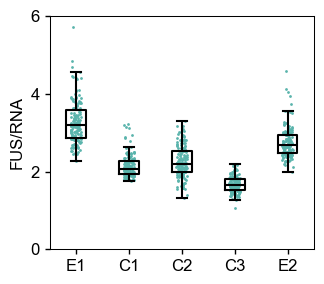

In [8]:
#pull data 
data_path= figures_data_dir + 'fig-2/FUS_RNA30nM.csv'
data = pd.read_csv(data_path)

# create sub-dataframe corresponding to 50 largest droplets from each experimental replicate
df_largeDrops_list = []
for rna in data.RNA.unique().tolist():
     for rep in data.replicate.unique().tolist():
        temp_df = data[
            data.RNA.isin([rna]) & 
            data.replicate.isin([rep])].nlargest(50, 'area')
        df_largeDrops_list.append(temp_df)
df_largeDrops = pd.concat(df_largeDrops_list)

RNAlist = ['E1','C1','C2','C3','E2']

fig, ax = plt.subplots(figsize=(3.4,3))
sns.stripplot(
    data=df_largeDrops[df_largeDrops.RNA.isin(RNAlist)], x='RNA', y='ratio_PR_centroid_int', color='#5ab4ac',
    size=2, legend=False
    )
sns.boxplot(
    data=df_largeDrops[df_largeDrops.RNA.isin(RNAlist)], x='RNA', y='ratio_PR_centroid_int', color='k', fill=False, 
    showfliers=False, linecolor='k', gap=0.25, width=0.5, legend=False, zorder=20
)
plt.xlabel('')
plt.ylabel('FUS/RNA')
plt.ylim([0,6])
plt.yticks([0,2,4,6])
plt.tight_layout()

figname = 'fig-2/FUS_RNA_ratio'
if file_save:
    save_figure(fig, save_dir+figname)

plt.show()

### F - condensate area vs FUS/RNA intensity ratio

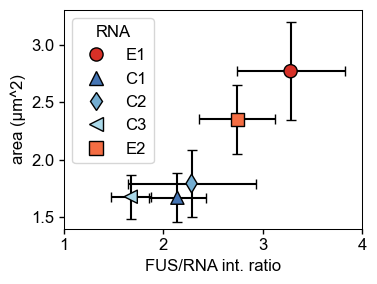

In [9]:
#pull data 
data_path= figures_data_dir + 'fig-2/FUS_RNA30nM.csv'
data = pd.read_csv(data_path)

# color palette
cmap_RNA = ['#d73027','#4575b4','#74add1','#abd9e9','#f46d43']

# create sub-dataframe corresponding to 50 largest droplets from each experimental replicate
df_largeDrops_list = []
for rna in data.RNA.unique().tolist():
     for rep in data.replicate.unique().tolist():
        temp_df = data[
            data.RNA.isin([rna]) & 
            data.replicate.isin([rep])].nlargest(50, 'area')
        df_largeDrops_list.append(temp_df)
df_largeDrops = pd.concat(df_largeDrops_list)

# create dataframe of aggregate statistics on the above sub-dataframe
df_largeDrops_agg_list = []
for rna in df_largeDrops.RNA.unique().tolist():
    temp_df = df_largeDrops[
        df_largeDrops.RNA.isin([rna])]
                    
    df_largeDrops_agg_list.append(
        pd.DataFrame({
                'RNA': rna,
                'P_mean': temp_df.centroid_int_prt.mean(),
                'P_std': temp_df.centroid_int_prt.std(),
                'R_mean': temp_df.centroid_int_rna.mean(),
                'R_std': temp_df.centroid_int_rna.std(),
                'PR_mean': temp_df.ratio_PR_centroid_int.mean(),
                'PR_std': temp_df.ratio_PR_centroid_int.std(),
                'area_mean': temp_df.area.mean(),
                'area_std': temp_df.area.std(),
                'ecc_mean': temp_df.eccentricity.mean(),
                'ecc_std': temp_df.eccentricity.std()
            }, index=[0])
        )
df_largeDrops_agg = pd.concat(df_largeDrops_agg_list)

# list of RNAs to plot
RNAlist = ['E1','C1','C2','C3','E2']
markers = {'E1': 'o', 'C1': '^', 'C2': 'd', 'C3': '<', 'E2': 's'}

fig, ax = plt.subplots(figsize=(4,3))
plt.errorbar(
    x=df_largeDrops_agg[df_largeDrops_agg.RNA.isin(RNAlist)].PR_mean.tolist(),
    y=df_largeDrops_agg[df_largeDrops_agg.RNA.isin(RNAlist)].area_mean.tolist(),
    xerr=df_largeDrops_agg[df_largeDrops_agg.RNA.isin(RNAlist)].PR_std.tolist(),
    yerr=df_largeDrops_agg[df_largeDrops_agg.RNA.isin(RNAlist)].area_std.tolist(),
    ls='none', capsize=3.5, color = 'k'
)
sns.scatterplot(data = df_largeDrops_agg[df_largeDrops_agg.RNA.isin(RNAlist)],
                x='PR_mean', y='area_mean', hue='RNA', style = 'RNA',
                palette = cmap_RNA, markers=markers, legend=True,
                s=90, linewidth=1, edgecolor='k', alpha=1, zorder=200)
plt.xlabel('FUS/RNA int. ratio')
plt.xlim([1,4])
plt.ylim([1.4,3.3])
plt.ylabel('area (µm^2)')
plt.tight_layout()

figname = 'fig-2/area_vs_FUS_RNA_ratio'
if file_save:
    save_figure(fig, save_dir+figname)

plt.show()

## Figure 3

### B - NONO intensity

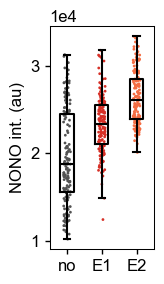

In [10]:
#pull data 
data_path= figures_data_dir + 'fig-3/NONO_RNA15nM.csv'
data = pd.read_csv(data_path)

# create sub-dataframe corresponding to 50 largest droplets from each experimental replicate
df_largeDrops_list = []
for rna in data.RNA.unique().tolist():
     for rep in data.rep.unique().tolist():
        temp_df = data[
            data.RNA.isin([rna]) & 
            data.rep.isin([rep])].nlargest(50, 'area')
        df_largeDrops_list.append(temp_df)
df_largeDrops = pd.concat(df_largeDrops_list)

# color palette
nEE_pal = ['#525252','#d73027','#f46d43']

fig,ax = plt.subplots(figsize=(1.8,3))
sns.stripplot(
    data=df_largeDrops, x='RNA', y='centroid_int', hue='RNA', palette=nEE_pal, size=2, legend=False
)
sns.boxplot(
    data=df_largeDrops, x='RNA', y='centroid_int', color='k', fill=False,
    showfliers=False, width=0.5, gap=0.25, legend=False, zorder=20
)
plt.xlabel('')
plt.ylabel('NONO int. (au)')
plt.ticklabel_format(axis='y', style='sci', scilimits=(4,4))
plt.yticks([10000,20000,30000])
plt.tight_layout()

figname = 'fig-3/NONO_intensity'
if file_save:
    save_figure(fig, save_dir+figname)

plt.show()

### C - Proteomics data

/tmp/ipykernel_16809/2637804488.py:22: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


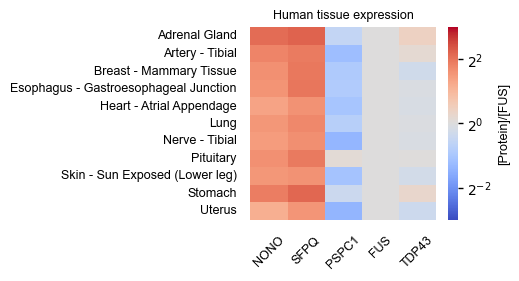

In [11]:
snyder_data_file = figures_data_dir + 'fig-3/Synder_proteomics_processed.xlsx'
figdata = pd.read_excel(snyder_data_file, sheet_name='Sheet1',index_col=0)
xticklabels = [x.upper() for x in figdata.index]
from matplotlib.ticker import LogLocator, LogFormatter
f,ax = plt.subplots(1,1,figsize=(3,2.5))
make_nice_axis(ax)

# unique_tissues = figdata['Tissue']
# yticklabels = 
ax = sns.heatmap(np.log2(figdata.values.astype(float).T),cmap="coolwarm",vmin=-3,vmax=3)
ax.set_yticklabels(figdata.columns,rotation=0,fontsize=9)
ax.set_xticklabels(xticklabels,rotation=45,fontsize=9)
ax.xaxis.set_tick_params(bottom=False,top=False)
ax.yaxis.set_tick_params(bottom=False,top=False)
# Set the colorbar ticks to be 2^-2, 2^0, 2^2
cbar = ax.collections[0].colorbar
cbar.set_ticks([-2, 0, 2])
cbar.set_ticklabels([r'$2^{-2}$', r'$2^{0}$', r'$2^{2}$'],fontsize=10)
cbar.set_label('[Protein]/[FUS]',fontsize=9)
ax.set_title('Human tissue expression',fontsize=9)
figname = 'fig-3/Snyder_proteomics_heatmap'
plt.tight_layout()
if file_save:
    save_figure(f,save_dir+figname) 
plt.show()

### E - FUS/RNA intensity ratio vs NONO/FUS stoichiometry

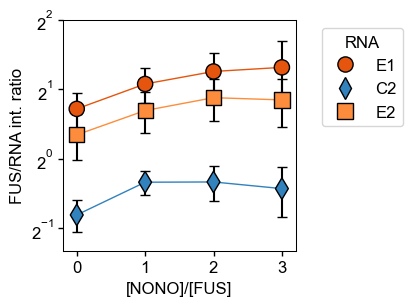

In [12]:
#pull data 
data_path= figures_data_dir + 'fig-3/FUS_NONO_RNA15nM.csv'
data = pd.read_csv(data_path)

# create sub-dataframe corresponding to 50 largest droplets from each experimental replicate
df_largeDrops_list = []
for rna in data.RNA.unique().tolist():
    for NFr in data.NONO_FUS_ratio.unique().tolist():
        for rep in data.replicate.unique().tolist():
            temp_df = data[
                data.RNA.isin([rna]) & 
                data.NONO_FUS_ratio.isin([NFr]) &
                data.replicate.isin([rep])].nlargest(50, 'area')
            df_largeDrops_list.append(temp_df)
df_largeDrops = pd.concat(df_largeDrops_list)

# create dataframe of aggregate statistics on the above sub-dataframe
df_largeDrops_agg_list = []
for rna in df_largeDrops.RNA.unique().tolist():
    for NFr in df_largeDrops.NONO_FUS_ratio.unique().tolist():
        temp_df = df_largeDrops[
            df_largeDrops.RNA.isin([rna]) & 
            df_largeDrops.NONO_FUS_ratio.isin([NFr])]
                    
        df_largeDrops_agg_list.append(
            pd.DataFrame({
                    'RNA': rna,
                    'NONO_FUS_ratio': NFr,
                    'F_mean': temp_df.centroid_int_prt.mean(),
                    'F_std': temp_df.centroid_int_prt.std(),
                    'R_mean': temp_df.centroid_int_rna.mean(),
                    'R_std': temp_df.centroid_int_rna.std(),
                    'FR_mean': temp_df.ratio_PR_centroid_int.mean(),
                    'FR_std': temp_df.ratio_PR_centroid_int.std(),
                    'area_mean': temp_df.area.mean(),
                    'area_std': temp_df.area.std(),
                    'ecc_mean': temp_df.eccentricity.mean(),
                    'ecc_std': temp_df.eccentricity.std()
                }, index=[0])
            )
df_largeDrops_agg = pd.concat(df_largeDrops_agg_list)

# marker shapes and color palette
markers = {'E1': 'o', 'C2': 'd', 'E2': 's'}
ECE_palette = ['#e6550d','#3182bd','#fd8d3c']

fig, ax = plt.subplots(figsize=(3,3))
plt.errorbar(
    x=df_largeDrops_agg.NONO_FUS_ratio.tolist(),
    y=df_largeDrops_agg.FR_mean.tolist(),
    yerr=df_largeDrops_agg.FR_std.tolist(),
    ls='none', capsize=3.5, color = 'k')
sns.lineplot(
    data = df_largeDrops_agg, x='NONO_FUS_ratio', y='FR_mean', hue='RNA',
    palette=ECE_palette, legend=False,
    linewidth=1, zorder=100)
axl = sns.scatterplot(
    data = df_largeDrops_agg, x='NONO_FUS_ratio', y='FR_mean', hue='RNA', style='RNA',
    palette=ECE_palette, markers=markers, legend=True,
    s=120, linewidth=1, edgecolor='k', alpha=1, zorder=200)
sns.move_legend(axl, "upper right", bbox_to_anchor=(1.5, 1))
plt.xlabel('[NONO]/[FUS]')
plt.xlim([-0.2,3.2])
plt.xticks([0,1,2,3])
plt.ylabel('FUS/RNA int. ratio')
plt.yscale('log', base=2)
plt.ylim([0.4,4])
plt.yticks([0.5,1,2,4])
# plt.tight_layout()

figname = 'fig-3/FUS_RNA_ratio_vs_NONO_FUS_stoichiometry'
if file_save:
    save_figure(fig, save_dir+figname)

plt.show()

### F - FRAP curves

#### Import additional packages from scipy for curve fitting

In [13]:
from scipy.optimize import curve_fit
import scipy.special as special # for Bessel functions
import scipy.stats as stats

#### FRAP fitting model function

In [14]:
def model_func(x, A, tau):
  return A*(np.exp((-2*tau)/x) * (special.i0((2*tau)/x) + special.i1((2*tau)/x)))

#### Perform curve fitting

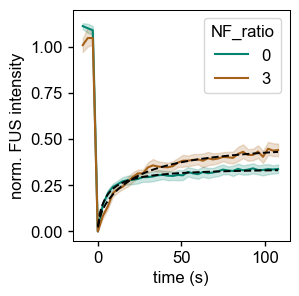

In [15]:
#pull data 
data_path= figures_data_dir + 'fig-3/FUS_NONO_FRAP_data.csv'
data = pd.read_csv(data_path)

# perform curve fitting
Cnorm_av = data.groupby(['NF_ratio','time']).Cnorm_grn.agg(['mean'])
Cnorm_av = Cnorm_av.reset_index()

xdata0 = Cnorm_av[Cnorm_av.NF_ratio == 0]['time'].tolist()[4:]
ydata0 = Cnorm_av[Cnorm_av.NF_ratio == 0]['mean'].tolist()[4:]
popt0, pcov0 = curve_fit(model_func, xdata0, ydata0)

xdata3 = Cnorm_av[Cnorm_av.NF_ratio == 3]['time'].tolist()[4:]
ydata3 = Cnorm_av[Cnorm_av.NF_ratio == 3]['mean'].tolist()[4:]
popt3, pcov3 = curve_fit(model_func, xdata3, ydata3)

xmodel = np.linspace(0.1, max(xdata0), 100)
ymodel0 = model_func(xmodel, popt0[0], popt0[1])
ymodel3 = model_func(xmodel, popt3[0], popt3[1])

fig, ax = plt.subplots(figsize=(2.8,3))
sns.lineplot(data=data,x='time',y='Cnorm_grn',hue='NF_ratio',palette=['#018571','#a6611a'])
plt.plot(xmodel, ymodel0, color='k', linewidth=1.4, linestyle='--')
plt.plot(xmodel, ymodel3, color='k', linewidth=1.4, linestyle='--')
plt.xlim(-15,115)
plt.ylim([-0.05,1.2])
plt.xticks([0,50,100])
plt.xlabel('time (s)')
plt.ylabel('norm. FUS intensity')

figname = 'fig-3/FUS_FRAP_curves'
if file_save:
    save_figure(fig, save_dir+figname)

plt.show()

### F - fit parameter box plots

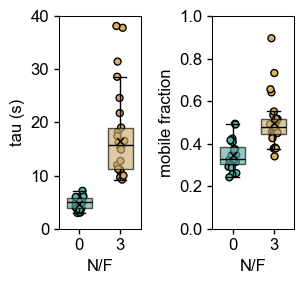

In [16]:
#pull data 
data_path= figures_data_dir + 'fig-3/FUS_NONO_FRAP_fit_params.csv'
data = pd.read_csv(data_path)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(3.2,3))

# plot tau
sns.boxplot(data=data, x='NF_ratio', y='tau_grn', hue='NF_ratio', ax=ax1,
            palette=['#5ab4ac','#d8b365'], showfliers=False, boxprops=dict(alpha=.65),
            linecolor='k', width=0.6, legend=False, zorder=20)
sns.stripplot(data=data,
              x='NF_ratio', y='tau_grn', hue='NF_ratio', ax=ax1,
              palette=['#5ab4ac','#d8b365'],
              dodge=False, jitter=True,
              edgecolor='k',linewidth=1, size=5,
              zorder=1, legend=False)
sns.stripplot(x=[0,3], y=[popt0[1],popt3[1]],
              color='#000000', ax=ax1,
              marker = 'x',
              dodge=False, jitter=False,
              edgecolor='k', linewidth=1, size=5,
              zorder=40, legend=False)
ax1.set_xlabel('N/F')
ax1.set_ylabel('tau (s)')
ax1.set_ylim([0,40])
ax1.set_yticks([0,10,20,30,40])

# plot A (mobile fraction)
sns.boxplot(data=data, x='NF_ratio', y='A_grn', hue='NF_ratio', ax=ax2,
            palette=['#5ab4ac','#d8b365'], showfliers=False, boxprops=dict(alpha=.65),
            linecolor='k', width=0.6, legend=False, zorder=20)
sns.stripplot(data=data,
              x='NF_ratio', y='A_grn', hue='NF_ratio', ax=ax2,
              palette=['#5ab4ac','#d8b365'],
              dodge=False, jitter=True,
              edgecolor='k', linewidth=1, size=5,
              zorder=1, legend=False)
sns.stripplot(x=[0,3], y=[popt0[0],popt3[0]],
              color='#000000', ax=ax2,
              marker = 'x',
              dodge=False, jitter=False,
              edgecolor='k', linewidth=1, size=5,
              zorder=40, legend=False)
ax2.set_xlabel('N/F')
ax2.set_ylabel('mobile fraction')
ax2.set_ylim([0,1])
ax2.set_yticks([0,0.2,0.4,0.6,0.8,1])
fig.tight_layout()

figname = 'fig-3/FUS_FRAP_fit_parameter_boxplots'
if file_save:
    save_figure(fig, save_dir+figname)

plt.show()

## Figure 4

### A - FUS and TDP-43 motif distribution

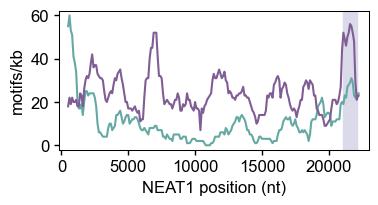

In [17]:
#pull data 
data_path= figures_data_dir + 'fig-2/motif_density.csv'
data = pd.read_csv(data_path)

E3_rng = [21100-1, 22100-1]

fig, ax = plt.subplots(figsize=(4,1.8))
plt.axvspan(E3_rng[0], E3_rng[1], color='#dadaeb', alpha=1)
sns.lineplot(data=data, x='NEAT1_position', y='FUS', color='#65a9a3')
sns.lineplot(data=data, x='NEAT1_position', y='TDP43', color='#805d94')
plt.xlabel("NEAT1 position (nt)")
plt.ylabel("motifs/kb")
plt.xlim([-200,23000])
plt.ylim([-2,62])
plt.yticks([0,20,40,60])

figname = 'fig-4/NEAT1MotifDistr_FUS_TDP43'
if file_save:
    save_figure(fig, save_dir+figname)

plt.show()

### C - FUS intensity vs TDP-43 intensity

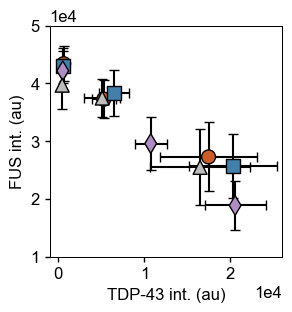

In [18]:
#pull data 
data_path= figures_data_dir + 'fig-4/FUS_TDP43_coCond.csv'
data = pd.read_csv(data_path)

# create sub-dataframe corresponding to 50 largest droplets from each experimental replicate
df_largeDrops_list = []
for rna in data.RNA.unique().tolist():
    for TFr in data.TDP43_FUS_ratio.unique().tolist():
        for rep in data.replicate.unique().tolist():
            temp_df = data[
                data.RNA.isin([rna]) & 
                data.TDP43_FUS_ratio.isin([TFr]) &
                data.replicate.isin([rep])].nlargest(50, 'area')
            df_largeDrops_list.append(temp_df)
df_largeDrops = pd.concat(df_largeDrops_list)

# create dataframe of aggregate statistics on the above sub-dataframe
df_largeDrops_agg_list = []
for rna in df_largeDrops.RNA.unique().tolist():
    for TFr in df_largeDrops.TDP43_FUS_ratio.unique().tolist():
        temp_df = df_largeDrops[
            df_largeDrops.RNA.isin([rna]) & 
            df_largeDrops.TDP43_FUS_ratio.isin([TFr])]
        
        df_largeDrops_agg_list.append(
            pd.DataFrame({
                    'RNA': rna,
                    'TDP43_FUS_ratio': TFr,
                    'F_mean': temp_df.centroid_int_grn.mean(),
                    'F_std': temp_df.centroid_int_grn.std(),
                    'T_mean': temp_df.centroid_int_red.mean(),
                    'T_std': temp_df.centroid_int_red.std(),
                    'area_mean': temp_df.area.mean(),
                    'area_std': temp_df.area.std(),
                    'ecc_mean': temp_df.eccentricity.mean(),
                    'ecc_std': temp_df.eccentricity.std()
                }, index=[0])
            )
df_largeDrops_agg = pd.concat(df_largeDrops_agg_list)

# marker shape and size
markers = {'E1': 'o', 'C2': 's', 'E3': 'd', 'E3_BL': '^'}
mksz = 100

fig, ax = plt.subplots(figsize=(3,3))
plt.errorbar(
    x=df_largeDrops_agg.T_mean.tolist(),
    y=df_largeDrops_agg.F_mean.tolist(),
    xerr=df_largeDrops_agg.T_std.tolist(),
    yerr=df_largeDrops_agg.F_std.tolist(),
    ls='none', capsize=3.5, color = 'k'
)
sns.scatterplot(data = df_largeDrops_agg[df_largeDrops_agg.TDP43_FUS_ratio.isin([0.00])],
              x='T_mean', y='F_mean', hue='RNA', style = 'RNA',
              palette = ['#cb5e28','#427fab','#af8dc3','#bdbdbd'], markers=markers, legend=False,
              s=mksz, linewidth=1, edgecolor='k', alpha=1, zorder=200)
sns.scatterplot(data = df_largeDrops_agg[df_largeDrops_agg.TDP43_FUS_ratio.isin([0.10])],
              x='T_mean', y='F_mean', hue='RNA', style = 'RNA',
              palette = ['#cb5e28','#427fab','#af8dc3','#bdbdbd'], markers=markers, legend=False,
              s=mksz, linewidth=1, edgecolor='k', alpha=1, zorder=300)
sns.scatterplot(data = df_largeDrops_agg[df_largeDrops_agg.TDP43_FUS_ratio.isin([0.25])],
              x='T_mean', y='F_mean', hue='RNA', style = 'RNA',
              palette = ['#cb5e28','#427fab','#af8dc3','#bdbdbd'], markers=markers, legend=False,
              s=mksz, linewidth=1, edgecolor='k', alpha=1, zorder=400)
plt.ticklabel_format(axis='both', style='sci', scilimits=(4,4))
plt.xlabel('TDP-43 int. (au)')
plt.ylabel('FUS int. (au)')
plt.xlim([-1000,26000])
plt.ylim([10000,50000])

figname = 'fig-4/FUS_vs_TDP43_intensity'
if file_save:
    save_figure(fig, save_dir+figname)

plt.show()


## Figure 5

### B - Maximum Intensity Plots

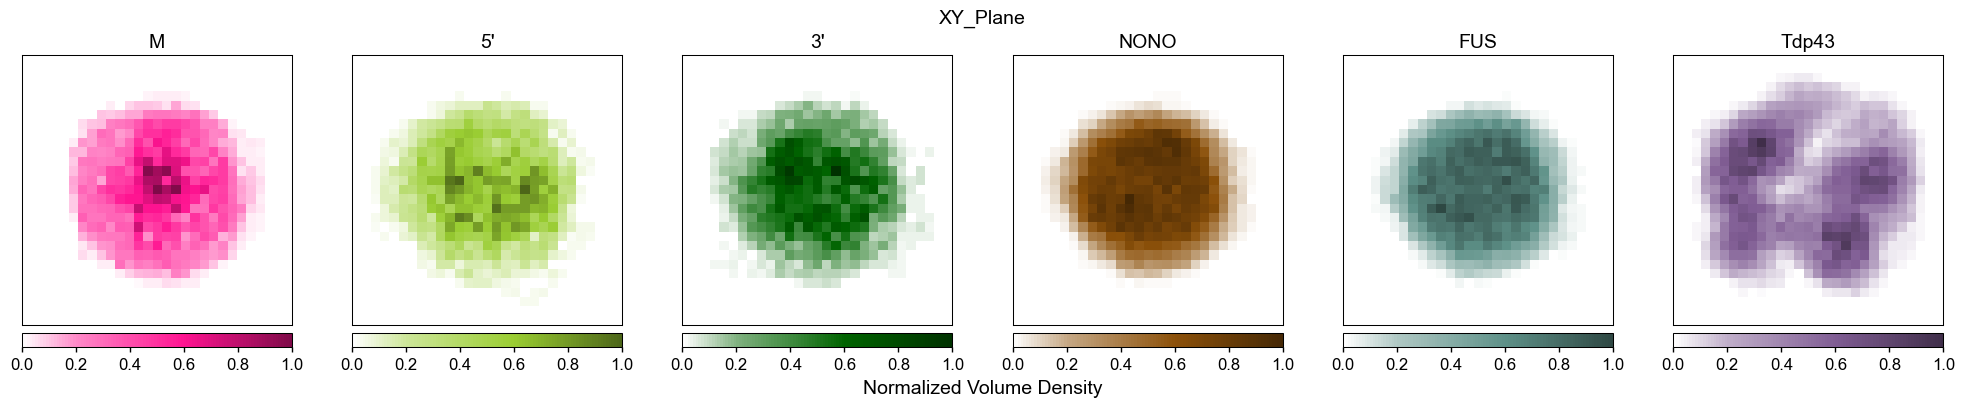

In [19]:
#load data
z_plane_mip=figures_data_dir +'fig-5/NewModel_MIP_LC_z_avg'
data=pickle.load(open(z_plane_mip,'rb'))

#create name and color dictionary to rotate through
color_dict = {'M': mip_color_list['NEAT1-M'], 'E1': mip_color_list['NEAT1-E1'], 'E2': mip_color_list['NEAT1-E2'], 'P1':  mip_color_list['NONO'], 'P2': mip_color_list['FUS'], 'P3': mip_color_list['TDP43']}
name_dict={'total':'Entire Cluster','M':'M','E1':"5'",'E2':"3'",'P1':'NONO','P2':'FUS','P3':'Tdp43'}

#rotate through each species and plot
fig,ax=plt.subplots(1,len(data)-1,figsize=(20,4))
n=0
for sp,mip in data.items():
    if sp=='total':
        continue
    im=ax[n].imshow(mip.T/np.max(mip.T), cmap=color_dict[sp], vmin=0, origin='lower',interpolation='nearest') 
    ax[n].set_xticks([])    
    ax[n].set_yticks([])
    ax[n].set_title(name_dict[sp], fontsize=14)
    divider = make_axes_locatable(ax[n])
    cax = divider.append_axes("bottom", size="5%", pad=0.08)
    cbar = fig.colorbar(im, cax=cax, orientation='horizontal')
    cax.xaxis.set_ticks_position('bottom')
    cax.xaxis.set_label_position('bottom') 
    n+=1
fig.suptitle('XY_Plane', fontsize=14)
fig.supxlabel('Normalized Volume Density', fontsize=14)
fig.tight_layout()

#save if true
figname='fig-5/NewModel_MIP'

if file_save:
    save_figure(fig, save_dir + figname)

# SI Figures

### SI figures - MD Simulations

#### Old Model - S1

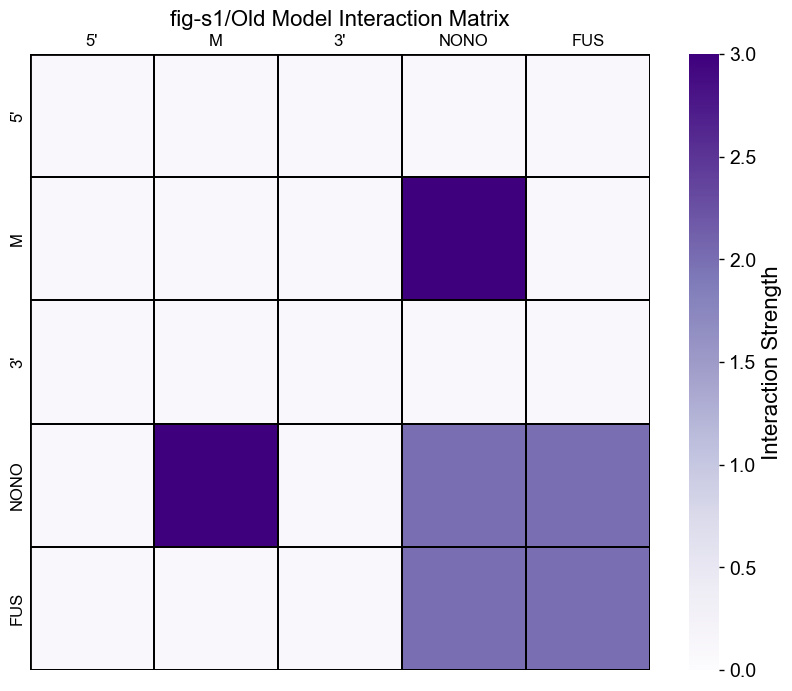

In [20]:
#Interaction Matrix
interaction_matrix='Data/fig-s1/OldModel_InteractionMatrix.csv'
csv_to_matrix(interaction_matrix,'fig-s1/Old Model Interaction Matrix',save_dir + '/fig-s1/', oldmodel=True,annot=False,file_save=file_save)

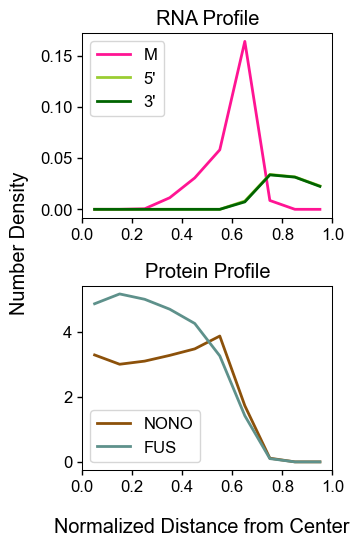

In [21]:
## Density Profile ##
#Load Data
data=pickle.load(open(figures_data_dir + 'fig-s1/OldModel_Density_LC_avg_clean','rb'))

## Rotate through each species and plot ##
color_dict={'M_rdf':'deeppink','E1_rdf':'yellowgreen','E2_rdf':'darkgreen','P1_rdf':'#8C510A','P2_rdf':'#5E918B','P3_rdf':'#805D94'}
name_dict={'M_rdf':'M','E1_rdf':"5'",'E2_rdf':"3'",'P1_rdf':'NONO','P2_rdf':'FUS','P3_rdf':'TDP43'}

## Plotting ##
figure, axes = plt.subplots(2, 1, figsize=(4, 6))
for key in data.keys():
    if key.endswith('rdf'):
        if key in {'M_rdf', 'E1_rdf', 'E2_rdf'}:
            axes[0].plot(data[key.split('_')[0]+'_bin'],data[key], label=name_dict[key],color=color_dict[key],linewidth=2)
            axes[0].set_title('RNA Profile')
            axes[0].legend()
            axes[0].set_xlim(0,1)
        else: 
            if key=='P3_rdf':
                continue
            axes[1].plot(data[key.split('_')[0]+'_bin'],data[key], label=name_dict[key],color=color_dict[key],linewidth=2)
            axes[1].set_title('Protein Profile')
            axes[1].legend()
            axes[1].set_xlim(0,1)

        
figure.tight_layout(rect=[0.05, 0.05, 0.90, 0.90])
figure.supxlabel('Normalized Distance from Center')
figure.supylabel('Number Density')
figure.subplots_adjust(top=0.85)

#save if true
figname='fig-s1/NewModel_DensityProfile'

if file_save:
    save_figure(fig, save_dir + figname)

#### New Model -S9

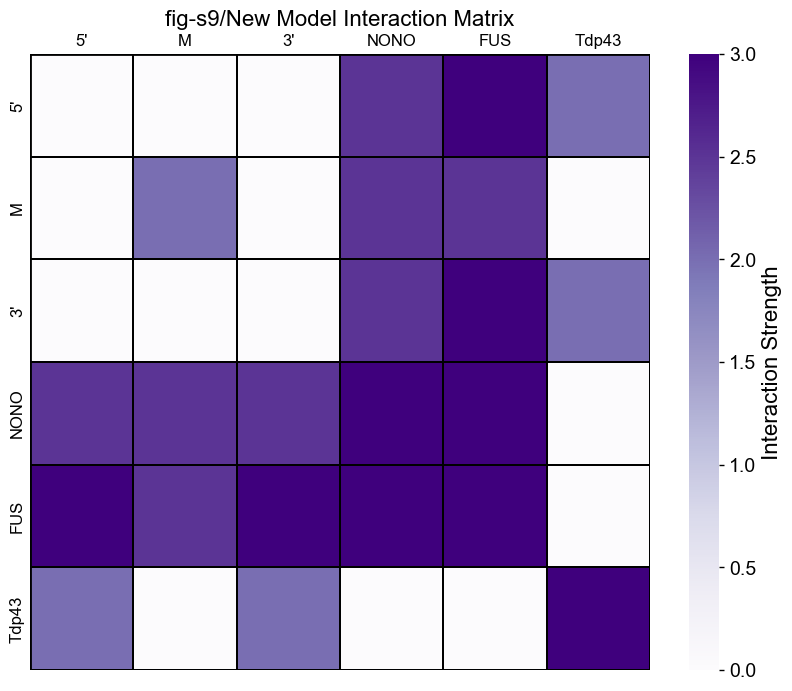

In [22]:
#Interaction Matrix
interaction_matrix=figures_data_dir+'fig-s9/NewModel_InteractionMatrix.csv'
csv_to_matrix(interaction_matrix,'fig-s9/New Model Interaction Matrix',save_dir + '/fig-s9/',oldmodel=False,annot=False,file_save=file_save)

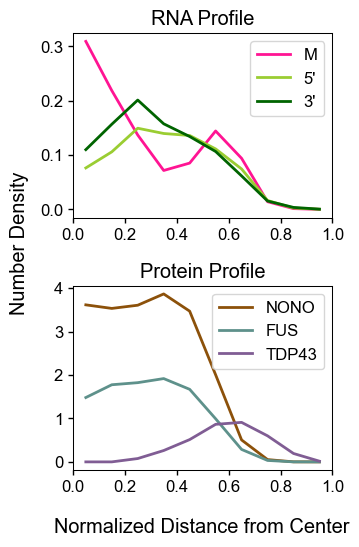

In [23]:
## Density Profile ##

#load data
data=pickle.load(open(figures_data_dir + 'fig-s9/NewModel_Density_LC_avg_clean','rb'))

## Rotate through each species and plot ##
color_dict={'M_rdf':'deeppink','E1_rdf':'yellowgreen','E2_rdf':'darkgreen','P1_rdf':'#8C510A','P2_rdf':'#5E918B','P3_rdf':'#805D94'}
name_dict={'M_rdf':'M','E1_rdf':"5'",'E2_rdf':"3'",'P1_rdf':'NONO','P2_rdf':'FUS','P3_rdf':'TDP43'}

## Plotting ##
figure, axes = plt.subplots(2, 1, figsize=(4, 6))
for key in data.keys():
    if key.endswith('rdf'):
        if key in {'M_rdf', 'E1_rdf', 'E2_rdf'}:
            axes[0].plot(data[key.split('_')[0]+'_bin'],data[key], label=name_dict[key],color=color_dict[key],linewidth=2)
            axes[0].set_title('RNA Profile')
            axes[0].legend()
            axes[0].set_xlim(0,1)
        else: 
            axes[1].plot(data[key.split('_')[0]+'_bin'],data[key], label=name_dict[key],color=color_dict[key],linewidth=2)
            axes[1].set_title('Protein Profile')
            axes[1].legend()
            axes[1].set_xlim(0,1)
        
figure.tight_layout(rect=[0.05, 0.05, 0.90, 0.90])
figure.supxlabel('Normalized Distance from Center')
figure.supylabel('Number Density')
figure.subplots_adjust(top=0.85)

#save if true
figname='fig-s9/NewModel_DensityProfile'

if file_save:
    save_figure(fig, save_dir + figname)

#### Transcription Dynamics - S10

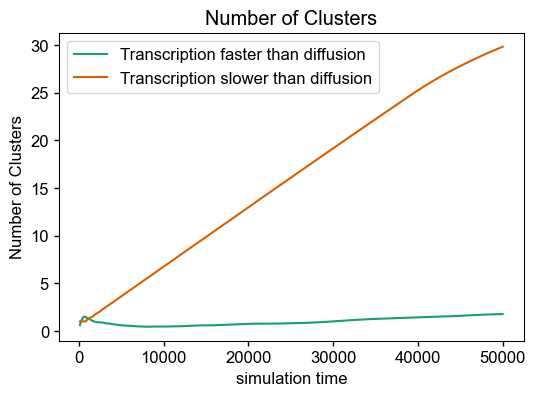

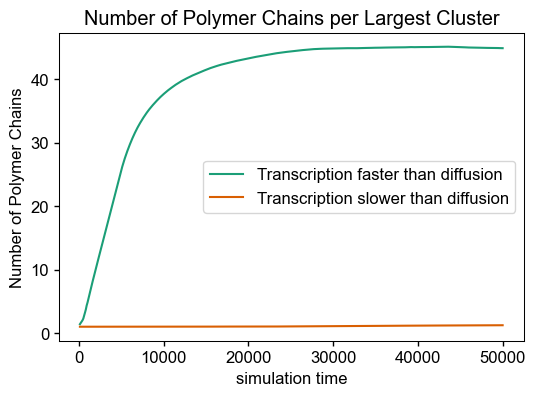

In [24]:
#load data for fast and slow transcription
fasttranscription=pickle.load(open(figures_data_dir + 'fig-s10/Trajectory_trigger_100_sp_24_Mep_3_Ep01_limit50','rb'))
slowtranscription=pickle.load(open(figures_data_dir + 'fig-s10/Trajectory_trigger_800_sp_2_Mep_3_Ep01_limit50','rb'))


#plot Number of Clusters
plt.figure(1)
plt.plot(fasttranscription['time'],fasttranscription['num_clusters'],label='Transcription faster than diffusion',color='#1b9e77')
plt.plot(slowtranscription['time'],slowtranscription['num_clusters'],label='Transcription slower than diffusion',color='#d95f02')
plt.xlabel('simulation time')
plt.ylabel('Number of Clusters')
plt.legend(loc=0) 
plt.title(f'Number of Clusters')
figname='fig-s10/NumberofClusters_Dynamics'
if file_save:
    save_figure(plt, save_dir + figname)


# plot Number of Polymer Chains in Largest Cluster
plt.figure(2)
plt.plot(fasttranscription['time'],fasttranscription['cluster_mass'],label='Transcription faster than diffusion',color='#1b9e77')
plt.plot(slowtranscription['time'],slowtranscription['cluster_mass'],label='Transcription slower than diffusion',color='#d95f02')
plt.xlabel('simulation time')
plt.ylabel('Number of Polymer Chains')
plt.title(f'Number of Polymer Chains per Largest Cluster')
plt.legend(loc=0)
figname='fig-s10/NumberofPolymerChainsinLargestCluster_Dynamics'
if file_save:
    save_figure(plt, save_dir + figname)

### SI figures - proteomics

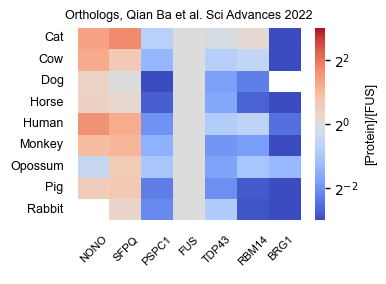

In [25]:
data_file = figures_data_dir + 'fig-s5/Ba_proteomics_processed.xlsx'
figdata = pd.read_excel(data_file, sheet_name='Sheet1',index_col=0)
xticklabels = [x for x in figdata.index]

from matplotlib.ticker import LogLocator, LogFormatter
f,ax = plt.subplots(1,1,figsize=(4,3))
make_nice_axis(ax)

# Create yticklabels with the means, replacing 'TARDBP' with 'TDP43' and 'SMARCA4' with 'BRG1'
yticklabels = [
    'TDP43\n'  if figdata.columns[x] == 'TARDBP' else
    'BRG1\n'  if figdata.columns[x] == 'SMARCA4' else
    figdata.columns[x] 
    for x in range(figdata.shape[1])
]

ax = sns.heatmap(np.log2(figdata.values.astype(float)),cmap="coolwarm",vmin=-3,vmax=3)
ax.set_xticklabels(yticklabels,rotation=45,fontsize=8)
ax.set_yticklabels(xticklabels,rotation=0,fontsize=9)
ax.xaxis.set_tick_params(bottom=False,top=False)
ax.yaxis.set_tick_params(bottom=False,top=False)
# Set the colorbar ticks to be 2^-2, 2^0, 2^2
cbar = ax.collections[0].colorbar
cbar.set_ticks([-2, 0, 2])
cbar.set_ticklabels([r'$2^{-2}$', r'$2^{0}$', r'$2^{2}$'],fontsize=10)
cbar.set_label('[Protein]/[FUS]',fontsize=9)
ax.set_title('Orthologs, Qian Ba et al. Sci Advances 2022', fontsize=9)
figname = 'fig-s5/proteomics_heatmap'
plt.tight_layout()
if file_save:
    save_figure(f,save_dir+figname) 
plt.show()

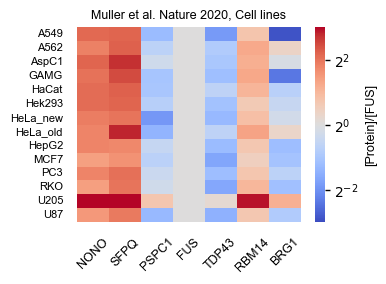

In [26]:
data_file = figures_data_dir + 'fig-s5/Muller_proteomics_processed.xlsx'
figdata = pd.read_excel(data_file, sheet_name='Sheet1',index_col=0)
xticklabels = [x for x in figdata.index]

from matplotlib.ticker import LogLocator, LogFormatter
f,ax = plt.subplots(1,1,figsize=(4,3))
make_nice_axis(ax)

ax = sns.heatmap(np.log2(figdata.values.astype(float)).T,cmap="coolwarm",vmin=-3,vmax=3)
ax.set_yticklabels(figdata.columns,rotation=0,fontsize=8)
ax.set_xticklabels(xticklabels,rotation=45,fontsize=9)
ax.xaxis.set_tick_params(bottom=False,top=False)
ax.yaxis.set_tick_params(bottom=False,top=False)
# Set the colorbar ticks to be 2^-2, 2^0, 2^2
cbar = ax.collections[0].colorbar
cbar.set_ticks([-2, 0, 2])
cbar.set_ticklabels([r'$2^{-2}$', r'$2^{0}$', r'$2^{2}$'],fontsize=10)
cbar.set_label('[Protein]/[FUS]',fontsize=9)
ax.set_title('Muller et al. Nature 2020, Cell lines', fontsize=9)
figname = 'fig-s5/proteomics_heatmap_muller'
plt.tight_layout()
if file_save:
    save_figure(f,save_dir+figname) 
plt.show()

### SI figures - experimental data

#### S2

##### S2E - NONO and SFPQ KD boxplot

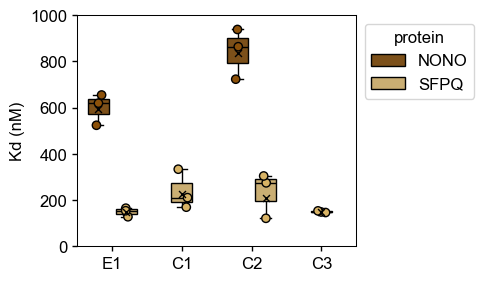

In [27]:
#pull data 
data_path= figures_data_dir + 'fig-2/EMSA_data.csv'
data_pooled_path = figures_data_dir + 'fig-2/EMSA_pooled_data.csv'
data = pd.read_csv(data_path)
data_pooled = pd.read_csv(data_pooled_path)

fig, ax = plt.subplots(figsize=[3.6,3])
sns.boxplot(data=data[data.RNA.isin(['E1']) & data.protein.isin(['NONO','SFPQ'])],
            x='RNA', y='KD', hue='protein', legend=True, showfliers=False, gap=0.25,
            palette=["#8c510a","#d8b365"], linecolor='k')
sns.stripplot(data=data[data.RNA.isin(['E1']) & data.protein.isin(['NONO','SFPQ'])],
              x='RNA', y='KD', hue='protein', s=6,
              legend=False, jitter=True, dodge=True,
              palette=["#8c510a","#d8b365"],
              linewidth=1, edgecolor="k")
sns.stripplot(data=data_pooled[data_pooled.RNA.isin(['E1']) & data_pooled.protein.isin(['NONO','SFPQ'])],
              x='RNA', y='KD', hue='protein', marker = 'x', s=5, palette = ["#000000","#000000"],
              legend=False, jitter=False, dodge=True,
              linewidth=1, edgecolor="k")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

sns.boxplot(data=data[data.RNA.isin(['C1']) & data.protein.isin(['SFPQ'])],
            x='RNA', y='KD', hue='protein', legend=False, showfliers=False, gap=0.25,
            palette=["#d8b365"], width=0.4, linecolor='k')
sns.stripplot(data=data[data.RNA.isin(['C1']) & data.protein.isin(['SFPQ'])],
              x='RNA', y='KD', hue='protein', s=6,
              legend=False, jitter=True, dodge=True,
              palette=["#d8b365"],
              linewidth=1, edgecolor="k")
sns.stripplot(data=data_pooled[data_pooled.RNA.isin(['C1']) & data_pooled.protein.isin(['SFPQ'])],
              x='RNA', y='KD', hue='protein', marker = 'x', s=5, palette = ["#000000"],
              legend=False, jitter=False, dodge=True,
              linewidth=1, edgecolor="k")

sns.boxplot(data=data[data.RNA.isin(['C2']) & data.protein.isin(['NONO','SFPQ'])],
            x='RNA', y='KD', hue='protein', legend=False, showfliers=False, gap=0.25,
            palette=["#8c510a","#d8b365"], linecolor='k')
sns.stripplot(data=data[data.RNA.isin(['C2']) & data.protein.isin(['NONO','SFPQ'])],
              x='RNA', y='KD', hue='protein', s=6,
              legend=False, jitter=True, dodge=True,
              palette=["#8c510a","#d8b365"],
              linewidth=1, edgecolor="k")
sns.stripplot(data=data_pooled[data_pooled.RNA.isin(['C2']) & data_pooled.protein.isin(['NONO','SFPQ'])],
              x='RNA', y='KD', hue='protein', marker = 'x', s=5, palette = ["#000000","#000000"],
              legend=False, jitter=False, dodge=True,
              linewidth=1, edgecolor="k")

sns.boxplot(data=data[data.RNA.isin(['C3']) & data.protein.isin(['SFPQ'])],
            x='RNA', y='KD', hue='protein', legend=False, showfliers=False, gap=0.25,
            palette=["#d8b365"], width=0.4, linecolor='k')
sns.stripplot(data=data[data.RNA.isin(['C3']) & data.protein.isin(['SFPQ'])],
              x='RNA', y='KD', hue='protein', s=6,
              legend=False, jitter=True, dodge=True,
              palette=["#d8b365"],
              linewidth=1, edgecolor="k")
sns.stripplot(data=data_pooled[data_pooled.RNA.isin(['C3']) & data_pooled.protein.isin(['SFPQ'])],
              x='RNA', y='KD', hue='protein', marker = 'x', s=5, palette = ["#000000"],
              legend=False, jitter=False, dodge=True,
              linewidth=1, edgecolor="k")
plt.ylabel('Kd (nM)')
plt.xlabel('')
plt.ylim([0,1000])
plt.yticks([0,200,400,600,800,1000])

figname = 'fig-s2/NONO_SFPQ_KD'
if file_save:
    save_figure(fig, save_dir+figname)

plt.show()

##### S2F - ∆∆G vs number of motifs

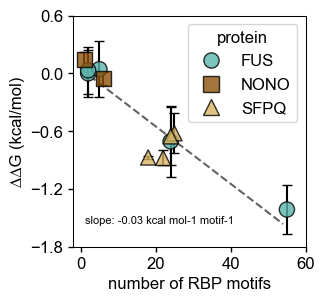

In [28]:
#pull data 
data_path= figures_data_dir + 'fig-2/EMSA_data.csv'
data = pd.read_csv(data_path)

# color palette
FNST_pal = ['#5ab4ac','#8c510a','#d8b365','#bcbddc']

# list of RNAs for which EMSA Kds were measured for each protein
RNAlist_F = ['E1','C1','C2','C3','E2','E3','E1_BH','E1_BL']
RNAlist_N = ['E1','C2']
RNAlist_S = ['E1','C1','C2','C3']
RNAlist_T = ['E3']

# number of motifs within each RNA for each protein
motiflist_F = [55, 2, 5, 2, 24, 29, 67, 18]
motiflist_N = [6, 1]
motiflist_S = [22, 25, 24, 18]
motiflist_T = [56]

# summary dataframe, ∆∆G (DDG)
df_DDG_summary = data.groupby(['protein','RNA']).DDG.agg(['mean','std'])
df_DDG_summary.rename(columns={'mean': 'DDG_mean', 'std': 'DDG_std'}, inplace=True)
df_DDG_summary = df_DDG_summary.reindex(['FUS','NONO','SFPQ','TDP-43'], level='protein')
df_DDG_summary = df_DDG_summary.reindex(['E1','C1','C2','C3','E2','E3','E1_BH','E1_BL'], level='RNA')
df_DDG_summary.reset_index(inplace=True)
df_DDG_summary = pd.concat([
    df_DDG_summary[df_DDG_summary.protein.isin(['FUS']) & df_DDG_summary.RNA.isin(RNAlist_F)],
    df_DDG_summary[df_DDG_summary.protein.isin(['NONO']) & df_DDG_summary.RNA.isin(RNAlist_N)],
    df_DDG_summary[df_DDG_summary.protein.isin(['SFPQ']) & df_DDG_summary.RNA.isin(RNAlist_S)],
    df_DDG_summary[df_DDG_summary.protein.isin(['TDP-43']) & df_DDG_summary.RNA.isin(RNAlist_T)],
])
df_DDG_summary.insert(2, 'motifs', motiflist_F + motiflist_N + motiflist_S + motiflist_T)

# proteins and RNAs to plot
proteinlist = ['FUS','NONO','SFPQ']
RNAlist = ['E1','C1','C2','C3','E2']
markers = {'FUS': 'o', 'NONO': 's', 'SFPQ': '^'}

df_sub = df_DDG_summary[df_DDG_summary.protein.isin(proteinlist) & df_DDG_summary.RNA.isin(RNAlist)]
x_vals = df_sub.motifs.tolist()
y_vals = df_sub.DDG_mean.tolist()
y_err_vals = df_sub.DDG_std.tolist()

fig, ax = plt.subplots(figsize=[3,3])

plt.errorbar(
    x=x_vals, y=y_vals, yerr=y_err_vals,
    ls='none', capsize=3.5, color = 'k', zorder=100)
sns.scatterplot(
    data=df_sub, x='motifs', y='DDG_mean', hue='protein', style='protein',
    palette=FNST_pal[:-1], markers=markers, legend=True,
    s=120, linewidth=1, edgecolor='k', alpha=0.8, zorder=200)

# linear fit to plotted data
coef = np.polyfit(x_vals,y_vals,1)
poly1d_fn = np.poly1d(coef)

xplot = list(range(0,np.max(x_vals)))
plt.plot(xplot, poly1d_fn(xplot), linestyle='--', color='#636363')
ax.text(0.05,0.1,
        'slope: ' + str(round(coef[0],3)) + ' kcal mol-1 motif-1',
        transform=ax.transAxes,
        fontsize=8)

plt.xlim([-2,60])
plt.ylim([-1.8,0.6])
plt.xticks([0,20,40,60])
plt.yticks([-1.8,-1.2,-0.6,0,0.6])
plt.ylabel('∆∆G (kcal/mol)')
plt.xlabel('number of RBP motifs')

figname = 'fig-s2/ddG_vs_motifs'
if file_save:
    save_figure(fig, save_dir+figname)

plt.show()

#### S4

##### S4A - condensate area vs number of FUS motifs

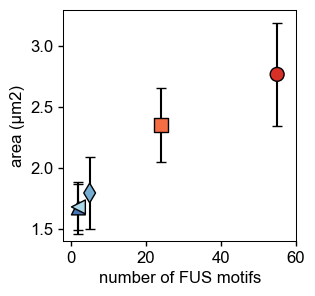

In [29]:
#pull data 
data_path= figures_data_dir + 'fig-2/FUS_RNA30nM.csv'
data = pd.read_csv(data_path)

# color palette
cmap_RNA = ['#d73027','#4575b4','#74add1','#abd9e9','#f46d43']

# create sub-dataframe corresponding to 50 largest droplets from each experimental replicate
df_largeDrops_list = []
for rna in data.RNA.unique().tolist():
     for rep in data.replicate.unique().tolist():
        temp_df = data[
            data.RNA.isin([rna]) & 
            data.replicate.isin([rep])].nlargest(50, 'area')
        df_largeDrops_list.append(temp_df)
df_largeDrops = pd.concat(df_largeDrops_list)

# create dataframe of aggregate statistics on the above sub-dataframe
df_largeDrops_agg_list = []
for rna in df_largeDrops.RNA.unique().tolist():
    temp_df = df_largeDrops[
        df_largeDrops.RNA.isin([rna])]
                    
    df_largeDrops_agg_list.append(
        pd.DataFrame({
                'RNA': rna,
                'P_mean': temp_df.centroid_int_prt.mean(),
                'P_std': temp_df.centroid_int_prt.std(),
                'R_mean': temp_df.centroid_int_rna.mean(),
                'R_std': temp_df.centroid_int_rna.std(),
                'PR_mean': temp_df.ratio_PR_centroid_int.mean(),
                'PR_std': temp_df.ratio_PR_centroid_int.std(),
                'area_mean': temp_df.area.mean(),
                'area_std': temp_df.area.std(),
                'ecc_mean': temp_df.eccentricity.mean(),
                'ecc_std': temp_df.eccentricity.std()
            }, index=[0])
        )
df_largeDrops_agg = pd.concat(df_largeDrops_agg_list)

# insert motifs column with the number of FUS motifs for each RNA
df_largeDrops_agg.insert(len(df_largeDrops_agg.columns), 'motifs',[55, 2, 5, 2, 24, 67, 18, 55, 55, 55, 55])

RNAlist = ['E1','C1','C2','C3','E2']
markers = {'E1': 'o', 'C1': '^', 'C2': 'd', 'C3': '<', 'E2': 's'}


fig, ax = plt.subplots(figsize=(3,3))
plt.errorbar(
    x=df_largeDrops_agg[df_largeDrops_agg.RNA.isin(RNAlist)].motifs.tolist(),
    y=df_largeDrops_agg[df_largeDrops_agg.RNA.isin(RNAlist)].area_mean.tolist(),
    yerr=df_largeDrops_agg[df_largeDrops_agg.RNA.isin(RNAlist)].area_std.tolist(),
    ls='none', capsize=3.5, color = 'k')
sns.scatterplot(data = df_largeDrops_agg[df_largeDrops_agg.RNA.isin(RNAlist)],
                x='motifs', y='area_mean', hue='RNA', style = 'RNA',
                palette = cmap_RNA, markers=markers, legend=False,
                s=100, linewidth=1, edgecolor='k', alpha=1, zorder=200)
plt.xlabel('number of FUS motifs')
plt.xlim([-2,60])
plt.xticks([0,20,40,60])
plt.ylabel('area (µm2)')
plt.ylim([1.4,3.3])
plt.yticks([1.5,2,2.5,3])

figname = 'fig-s4/area_vs_numberMotifs'
if file_save:
    save_figure(fig, save_dir+figname)

plt.show()

#### S6

##### S6F - TDP-43 intensity histograms at FUS condensate centroids

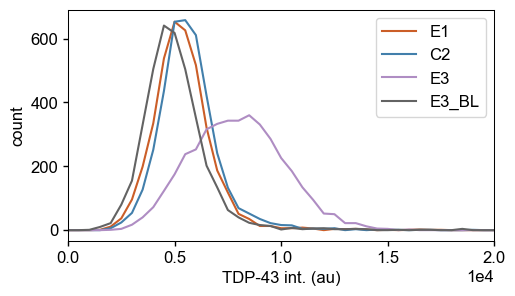

In [30]:
#pull data 
data_path= figures_data_dir + 'fig-4/FUS_TDP43_coCond.csv'
data = pd.read_csv(data_path)

# numpy to histogram, matplotlib to bar plot
bar_width = 500
bar_max = 22000
bin_range = np.arange(0-bar_width,bar_max,bar_width)

counts_TDP_E1, edges_TDP_E1 = np.histogram(
    data[data.RNA.isin(['E1']) & data.TDP43_FUS_ratio.isin([0.1])].centroid_int_red.tolist(), bins=bin_range)
counts_TDP_C2, edges_TDP_C2 = np.histogram(
    data[data.RNA.isin(['C2']) & data.TDP43_FUS_ratio.isin([0.1])].centroid_int_red.tolist(), bins=bin_range)
counts_TDP_E3, edges_TDP_E3 = np.histogram(
    data[data.RNA.isin(['E3']) & data.TDP43_FUS_ratio.isin([0.1])].centroid_int_red.tolist(), bins=bin_range)
counts_TDP_BL, edges_TDP_BL = np.histogram(
    data[data.RNA.isin(['E3_BL']) & data.TDP43_FUS_ratio.isin([0.1])].centroid_int_red.tolist(), bins=bin_range)

cumul_TDP_E1 = np.cumsum(counts_TDP_E1)
cumul_TDP_C2 = np.cumsum(counts_TDP_C2)
cumul_TDP_E3 = np.cumsum(counts_TDP_E3)
cumul_TDP_BL = np.cumsum(counts_TDP_BL)

fig, ax = plt.subplots(figsize=[5.5,3])
plt.plot(edges_TDP_E1[:-1], counts_TDP_E1, label='E1', color = '#cb5e28')
plt.plot(edges_TDP_C2[:-1], counts_TDP_C2, label='C2', color = '#427fab')
plt.plot(edges_TDP_E3[:-1], counts_TDP_E3, label='E3', color = '#af8dc3')
plt.plot(edges_TDP_BL[:-1], counts_TDP_BL, label='E3_BL', color = '#636363')
plt.xlim([0,20000])
plt.xticks([0,5000,10000,15000,20000])
plt.ticklabel_format(axis='x', style='sci', scilimits=(4,4))
plt.xlabel('TDP-43 int. (au)')
plt.ylabel('count')
plt.legend()

figname = 'fig-s6/TDP43_intensity_histograms'
if file_save:
    save_figure(fig, save_dir+figname)

plt.show()

##### S6G - TDP-43 intensity vs number of TDP-43 motifs

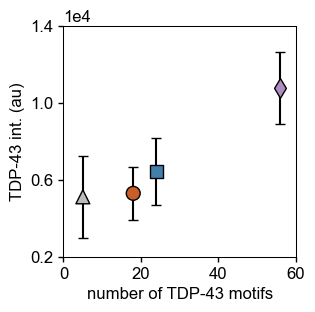

In [31]:
#pull data 
data_path= figures_data_dir + 'fig-4/FUS_TDP43_coCond.csv'
data = pd.read_csv(data_path)

# TDP-43 binding sites in E1, C2, E3, E3_BL
tdp43_bs = [18, 24, 56, 5]

# create sub-dataframe corresponding to 50 largest droplets from each experimental replicate
df_largeDrops_list = []
for rna in data.RNA.unique().tolist():
    for TFr in data.TDP43_FUS_ratio.unique().tolist():
        for rep in data.replicate.unique().tolist():
            temp_df = data[
                data.RNA.isin([rna]) & 
                data.TDP43_FUS_ratio.isin([TFr]) &
                data.replicate.isin([rep])].nlargest(50, 'area')
            df_largeDrops_list.append(temp_df)
df_largeDrops = pd.concat(df_largeDrops_list)

Tintp10_largeDrops = df_largeDrops[df_largeDrops['TDP43_FUS_ratio'].isin([0.1])].groupby(['RNA']).centroid_int_red.agg(['mean','std','sem','count','median'])
Tintp10_largeDrops.rename(columns={'mean': 'Tint_mean',
                                'std': 'Tint_std',
                                'sem': 'Tint_sem',
                                'count': 'Tint_count',
                                'median': 'Tint_median'}, inplace=True)
Tintp10_largeDrops.insert(3, 'Tint_95ci', [1.96*x for x in Tintp10_largeDrops['Tint_sem'].tolist()])
Tintp10_largeDrops = Tintp10_largeDrops.reindex(['E1','C2','E3','E3_BL'])
Tintp10_largeDrops.insert(6, 'motifs', tdp43_bs)
# make a flattened, non-indexed version
Tintp10_largeDrops_flat =  Tintp10_largeDrops.copy()
Tintp10_largeDrops_flat.reset_index(inplace=True)

# marker shape and size
markers = {'E1': 'o', 'C2': 's', 'E3': 'd', 'E3_BL': '^'}
mksz = 100

fig, ax = plt.subplots(figsize=[3,3])
plt.errorbar(
    x = Tintp10_largeDrops_flat.motifs.tolist(), 
    y = Tintp10_largeDrops_flat.Tint_mean.tolist(),
    yerr = Tintp10_largeDrops_flat.Tint_std.tolist(),
    ls='none', capsize=3.5, color = 'k'
    )
sns.scatterplot(
    data = Tintp10_largeDrops_flat, x='motifs', y='Tint_mean', hue='RNA', style = 'RNA',
    palette = ['#cb5e28','#427fab','#af8dc3','#bdbdbd'], markers=markers, legend=False,
    s=mksz, linewidth=1, edgecolor='k', alpha=1, zorder=400)
plt.xlim([0,60])
plt.ylim([2000,14000])
plt.xticks([0,20,40,60])
plt.yticks([2000,6000,10000,14000])
plt.ylabel('TDP-43 int. (au)')
plt.xlabel('number of TDP-43 motifs')
plt.ticklabel_format(axis='y', style='sci', scilimits=(4,4))

figname = 'fig-s6/TDP43_intensity_vs_TDP43_motifs'
if file_save:
    save_figure(fig, save_dir+figname)

plt.show()

##### S6H - area vs TDP-43 intensity

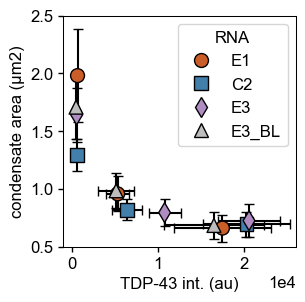

In [32]:
#pull data 
data_path= figures_data_dir + 'fig-4/FUS_TDP43_coCond.csv'
data = pd.read_csv(data_path)

# create sub-dataframe corresponding to 50 largest droplets from each experimental replicate
df_largeDrops_list = []
for rna in data.RNA.unique().tolist():
    for TFr in data.TDP43_FUS_ratio.unique().tolist():
        for rep in data.replicate.unique().tolist():
            temp_df = data[
                data.RNA.isin([rna]) & 
                data.TDP43_FUS_ratio.isin([TFr]) &
                data.replicate.isin([rep])].nlargest(50, 'area')
            df_largeDrops_list.append(temp_df)
df_largeDrops = pd.concat(df_largeDrops_list)

# create dataframe of aggregate statistics on the above sub-dataframe
df_largeDrops_agg_list = []
for rna in df_largeDrops.RNA.unique().tolist():
    for TFr in df_largeDrops.TDP43_FUS_ratio.unique().tolist():
        temp_df = df_largeDrops[
            df_largeDrops.RNA.isin([rna]) & 
            df_largeDrops.TDP43_FUS_ratio.isin([TFr])]
                    
        df_largeDrops_agg_list.append(
            pd.DataFrame({
                    'RNA': rna,
                    'TDP43_FUS_ratio': TFr,
                    'F_mean': temp_df.centroid_int_grn.mean(),
                    'F_std': temp_df.centroid_int_grn.std(),
                    'T_mean': temp_df.centroid_int_red.mean(),
                    'T_std': temp_df.centroid_int_red.std(),
                    'area_mean': temp_df.area.mean(),
                    'area_std': temp_df.area.std(),
                    'ecc_mean': temp_df.eccentricity.mean(),
                    'ecc_std': temp_df.eccentricity.std()
                }, index=[0])
            )
df_largeDrops_agg = pd.concat(df_largeDrops_agg_list)

markers = {'E1': 'o', 'C2': 's', 'E3': 'd', 'E3_BL': '^'}
mksz = 100

fig, ax = plt.subplots(figsize=(3,3))
plt.errorbar(
    x=df_largeDrops_agg.T_mean.tolist(),
    y=df_largeDrops_agg.area_mean.tolist(),
    xerr=df_largeDrops_agg.T_std.tolist(),
    yerr=df_largeDrops_agg.area_std.tolist(),
    ls='none', capsize=3.5, color = 'k'
)
sns.scatterplot(data = df_largeDrops_agg[df_largeDrops_agg.TDP43_FUS_ratio.isin([0.00])],
                x='T_mean', y='area_mean', hue='RNA', style = 'RNA',
                palette = ['#cb5e28','#427fab','#af8dc3','#bdbdbd'], markers=markers, legend=False,
                s=mksz, linewidth=1, edgecolor='k', alpha=1, zorder=200)
sns.scatterplot(data = df_largeDrops_agg[df_largeDrops_agg.TDP43_FUS_ratio.isin([0.10])],
              x='T_mean', y='area_mean', hue='RNA', style = 'RNA',
              palette = ['#cb5e28','#427fab','#af8dc3','#bdbdbd'], markers=markers, legend=False,
              s=mksz, linewidth=1, edgecolor='k', alpha=1, zorder=300)
sns.scatterplot(data = df_largeDrops_agg[df_largeDrops_agg.TDP43_FUS_ratio.isin([0.25])],
              x='T_mean', y='area_mean', hue='RNA', style = 'RNA',
              palette = ['#cb5e28','#427fab','#af8dc3','#bdbdbd'], markers=markers, legend=True,
              s=mksz, linewidth=1, edgecolor='k', alpha=1, zorder=400)
plt.ticklabel_format(axis='x', style='sci', scilimits=(4,4))
plt.xlabel('TDP-43 int. (au)')
plt.ylabel('condensate area (µm2)')
plt.xlim([-1000,26000])
plt.ylim([0.5,2.5])

figname = 'fig-s6/area_vs_TDP43_intensity'
if file_save:
    save_figure(fig, save_dir+figname)

plt.show()